<a href="https://colab.research.google.com/github/palmyss-pps/Alura_Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [4]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
from urllib.request import urlopen
import csv

urls = [url1, url2, url3, url4]

#Função para ler CSV a partir da URL

def ler_csv(url):
  dados = []
  with urlopen(url) as resposta:
    linhas = resposta.read().decode('utf-8').splitlines()
    leitor = csv.DictReader(linhas)
    for linha in leitor:
        dados.append(linha)
  return dados

#Análise de faturamento
faturamento_total = 0

for i, url in enumerate(urls):
  dados_loja = ler_csv(url)
  faturamento_loja = 0

  for venda in dados_loja:
    preco = float(venda['Preço']) #Somamos apenas o preço
    faturamento_loja += preco

  print(f"Faturamento Loja {i+1}: R$ {faturamento_loja:.2f}")
  faturamento_total += faturamento_loja

#Mostrar faturamento total
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58

Faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria


In [13]:
def vendas_por_categoria(loja, numero):
  vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
  print(f"\nVendas por categoria na loja {numero}:")
  print(vendas)

vendas_por_categoria(loja, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)


Vendas por categoria na loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis      

# 3. Média de Avaliação das Lojas

In [61]:
def ler_csv(url):
  dados = []
  with urlopen(url) as resposta:
    linhas = resposta.read().decode('utf-8').splitlines()
    leitor = csv.DictReader(linhas)
    for linha in leitor:
        dados.append(linha)
  return dados

def avaliacao_media(loja,numero):
  media = loja['Avaliação da compra'].mean()
  print(f"Avaliação média na loja {numero}: {media:.2f}")

avaliacao_media(loja, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)

Avaliação média na loja 1: 3.98
Avaliação média na loja 2: 4.04
Avaliação média na loja 3: 4.05
Avaliação média na loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [19]:
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

df_total['Receita'] = df_total['Preço']

vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

def top10_produtos(loja):
  dados = vendas[vendas['Loja'] == loja]

  top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(5)
  top_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(5)

  print(f"\n{loja} - Top 5 produtos que MAIS dinheiro geraram: ")
  for _, linha in top_mais_vendidos.iterrows():
    print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

  print(f"\n{loja} - Top 5 produtos que MENOS dinheiro geraram: ")
  for _, linha in top_menos_vendidos.iterrows():
    print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

lojas_unicas = vendas['Loja'].unique()

for loja in lojas_unicas:
  top10_produtos(loja)


Loja 1 - Top 5 produtos que MAIS dinheiro geraram: 
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40
  Smart TV - Receita: R$89936.15
  Lavadora de roupas - Receita: R$87711.30

Loja 1 - Top 5 produtos que MENOS dinheiro geraram: 
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27
  Jogo de copos - Receita: R$1812.15
  Xadrez de madeira - Receita: R$1907.42

Loja 2 - Top 5 produtos que MAIS dinheiro geraram: 
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48
  Lavadora de roupas - Receita: R$89016.81
  Smart TV - Receita: R$81522.94

Loja 2 - Top 5 produtos que MENOS dinheiro geraram: 
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54
  Xadrez de madeira - Receita: R$1717.05
  Jogo de copos - Receita: R$2056.69

Loja 3 - Top 5 prod

# 5. Frete Médio por Loja


In [21]:
df_total['Frete'] = df_total['Frete'].astype(float)

envio_medio = df_total.groupby('Loja')['Frete'].mean()

print("\nEnvio médio por loja:")
for loja, medio in envio_medio.items():
  print(f"{loja}: R${medio:.2f}")


Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


In [23]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

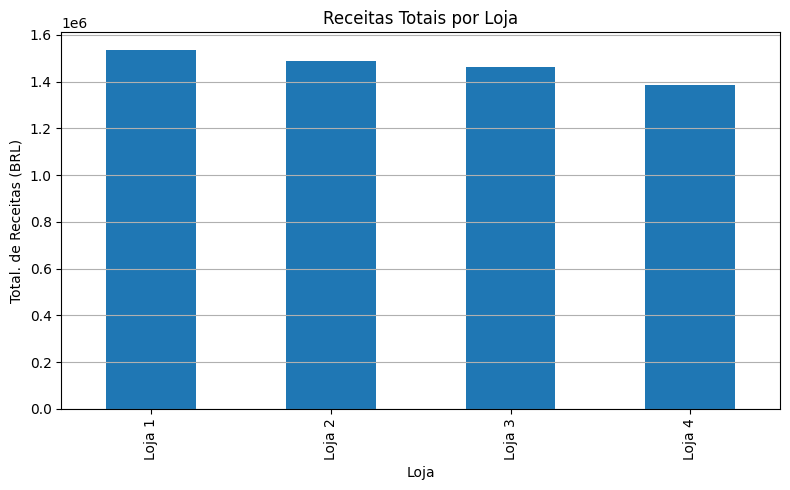

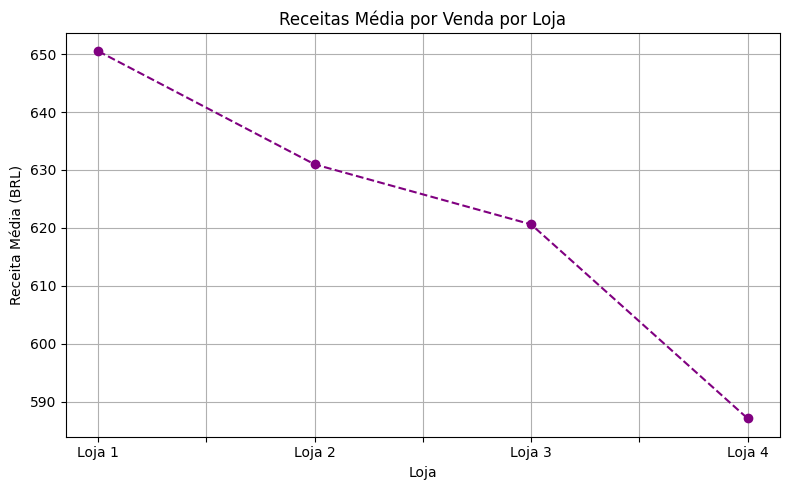

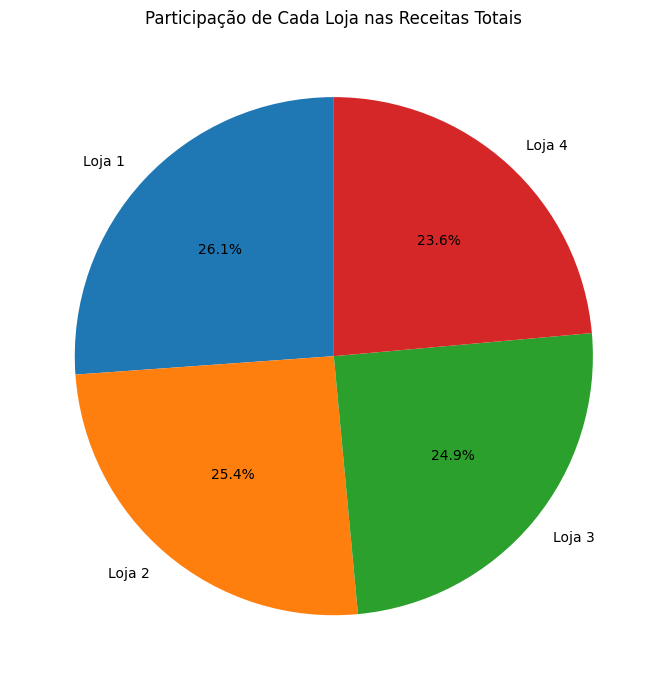

In [25]:
df_total['Preço'] = df_total['Preço'].astype(float)

df_total['Receita'] = df_total['Preço']

receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_receitas = receitas_totais

plt.figure(figsize=(8,5))
receitas_totais.plot(kind='bar')
plt.title('Receitas Totais por Loja')
plt.ylabel('Total. de Receitas (BRL)')
plt.xlabel('Loja')
plt.grid(axis='y')
plt.tight_layout()
plt.show

plt.figure(figsize=(8,5))
receita_media.plot(kind='line', marker='o', linestyle='--', color='purple')
plt.title('Receitas Média por Venda por Loja')
plt.ylabel('Receita Média (BRL)')
plt.xlabel('Loja')
plt.grid(True)
plt.tight_layout()
plt.show

plt.figure(figsize=(7,7))
distribuicao_receitas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação de Cada Loja nas Receitas Totais')
plt.ylabel('')
plt.tight_layout()
plt.show

Digite o número da loja de 1 a 4: 2


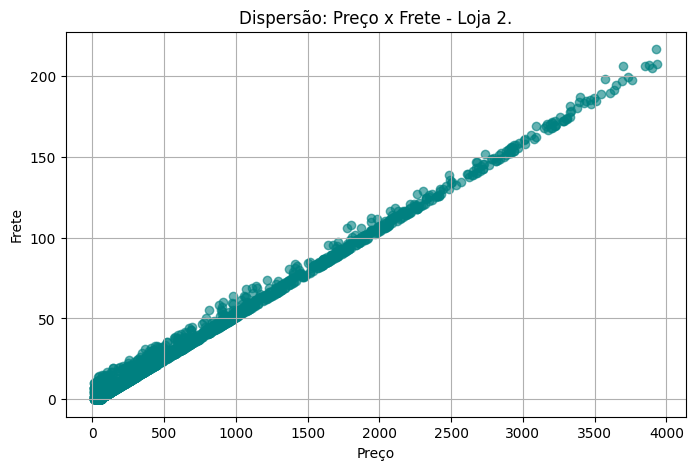

In [28]:
 lojas_dict = {
    1:loja,
    2:loja2,
    3:loja3,
    4:loja4
}

def contar_vendas_por_produto(df):
  vendas = df.to_dict(orient='records')
  produtos = {}

  for venda in vendas:
    produto = venda['Produto']
    if pd.notnull(produto):
      if produto not in produtos:
        produtos[produto] = 0
      produtos[produto] += 1

    produtos_ordenados = dict(sorted(produtos.items(), key=lambda item: item[1], reverse=True))
    return produtos_ordenados

numero_loja = int(input("Digite o número da loja de 1 a 4: "))

if numero_loja in lojas_dict:
  loja_selecionada = lojas_dict[numero_loja]

  plt.figure(figsize=(8,5))
  plt.scatter(loja_selecionada['Preço'], loja_selecionada['Frete'], alpha= 0.6, color='teal')
  plt.title(f'Dispersão: Preço x Frete - Loja {numero_loja}.')
  plt.xlabel('Preço')
  plt.ylabel('Frete')
  plt.grid(True)
  plt.show()

# 📝 Relatório Final – Análise de Vendas das Lojas

**📌 Introdução**

Esta análise tem como objetivo ajudar o Senhor João a decidir qual de suas quatro lojas deve ser vendida. A decisão será baseada em dados sobre:

- Faturamento total

- Vendas por categoria de produto

- Avaliação média dos clientes

- Produtos mais e menos vendidos

- Custo médio de frete

A seguir, apresentamos as principais descobertas e, ao final, uma recomendação clara baseada nos dados e em uma perspectiva estratégica.



# 📊 Análise dos Dados

**💰 Faturamento Total**

- Loja 1: R$ 1.534.509,12 (maior faturamento)

- Loja 2: R$ 1.488.459,06

- Loja 3: R$ 1.464.025,03

-- Loja 4: R$ 1.384.497,58 (menor faturamento)


➡️ **Loja 4 é a menos lucrativa em valores absolutos.**



# 🛒 Vendas por Categoria

Todas as lojas têm como principais fontes de receita os produtos **eletrônicos e eletrodomésticos**. No entanto, a ***Loja 4*** **tem os menores valores nessas categorias**, o que reforça seu desempenho abaixo da média.


# ⭐ Média das Avaliações dos Clientes

- Loja 3: 4.05 ⭐

- Loja 2: 4.04 ⭐

- Loja 4: 4.00 ⭐

- Loja 1: 3.98 ⭐

➡️ **Loja 4** tem uma avaliação apenas mediana — **não é a melhor em reputação, nem em vendas.**

# 🛒 Produtos Mais e Menos Vendidos

Todas as lojas têm os mesmos produtos de alto valor (TVs, celulares, geladeiras) no topo, mas a **Loja 4 apresenta valores ligeiramente menores em seus campeões de venda**, o que afeta seu faturamento geral.

# 🚚 Custo Médio de Frete

- Loja 4: R$ 31,28 (melhor custo de frete)

- Loja 3: R$ 33,07

- Loja 2: R$ 33,62

- Loja 1: R$ 34,69

➡️ Apesar do **menor custo de frete**, a Loja 4 **não converte essa vantagem em maior faturamento ou melhor avaliação.**

# 🔄 Considerações Estratégicas

# **🔹 Vender a Loja 4 – Decisão Equilibrada**
Esta é a recomendação dos instrutores do curso e também faz sentido a partir dos dados:

- Menor faturamento

- Avaliação média, sem destaque

- Desempenho mais fraco nas categorias principais

- Produtos de maior valor com receitas abaixo das demais lojas

💡 *Conclusão: vender a Loja 4 reduz o impacto no faturamento geral e mantém as operações com mais potencial.*

# **🔸 Outras Perspectivas**
Se o foco fosse maximizar o valor da venda, vender a Loja 1 ainda seria uma possibilidade interessante, já que ela tem o maior faturamento. No entanto:

- Tem a pior avaliação entre as lojas

- Custo de frete mais alto

- Perderia a loja mais forte da operação

*➡️ Essa alternativa tem maior risco estratégico a longo prazo.*

# **Recomendação Final**

Com base nos dados analisados, a recomendação é que o Senhor João venda a **Loja 4.**

Essa decisão **preserva o melhor desempenho financeiro (Loja 1)** e **as melhores reputações (Lojas 2 e 3)**, enquanto elimina a loja com **menor faturamento e desempenho médio em todas as outras frentes**. Além disso, sua vantagem no frete não se converteu em maior retorno financeiro ou melhor avaliação dos clientes.

# **Extra!  Análise de Desempenho Geográfico**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

In [4]:
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Frete'] = df_total['Frete'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)
df_total['Receita'] = df_total['Preço']

print(df_total.head())

                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  Receita  
0    cartao_credito                       8 -22.19 -48.79  Loja 1   2

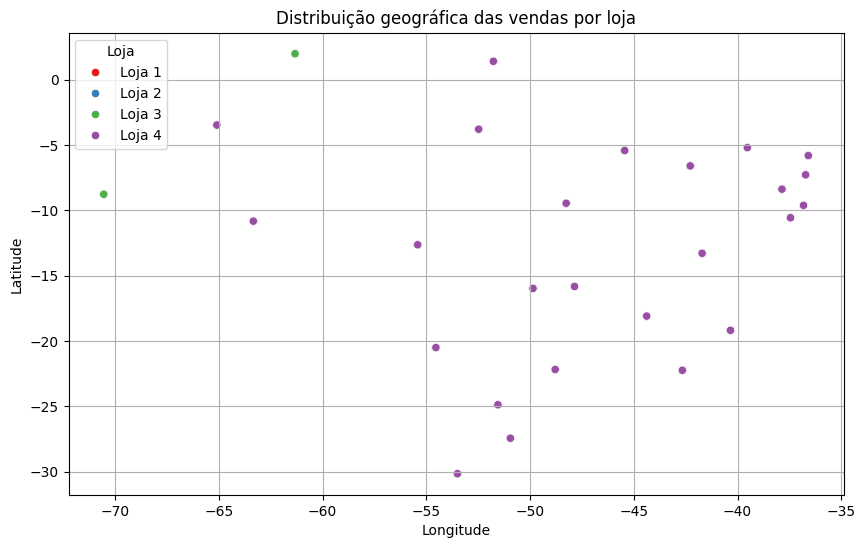

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_total, x='lon', y='lat', hue='Loja', palette='Set1')
plt.title("Distribuição geográfica das vendas por loja")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

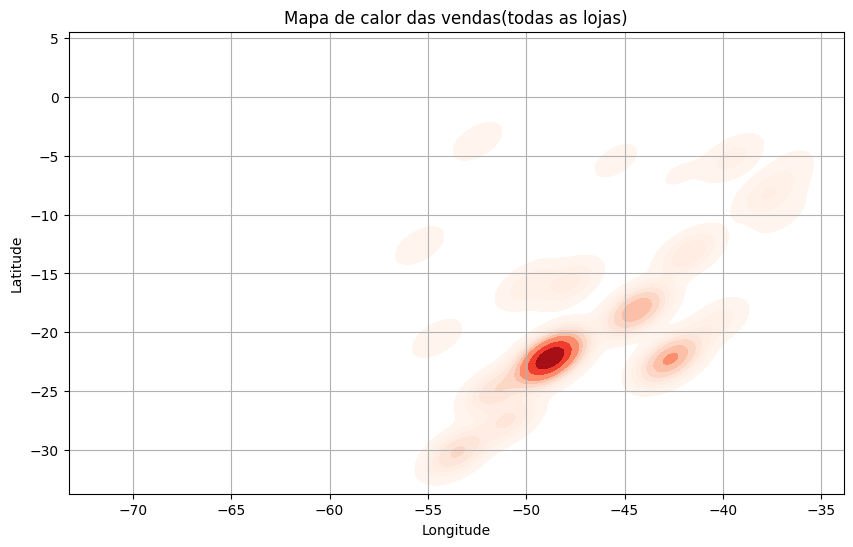

In [7]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df_total,
    x='lon',
    y='lat',
    fill=True,
    cmap='Reds',
    thresh=0.05
)
plt.title("Mapa de calor das vendas(todas as lojas)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

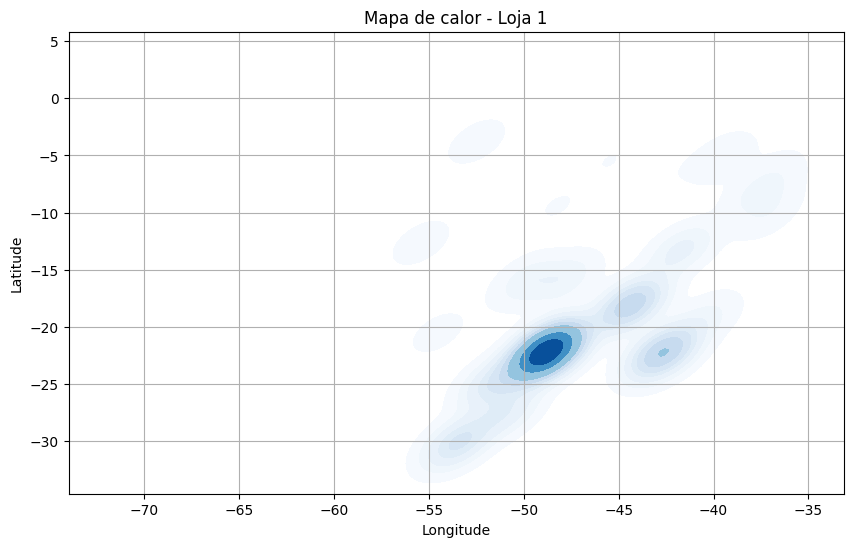

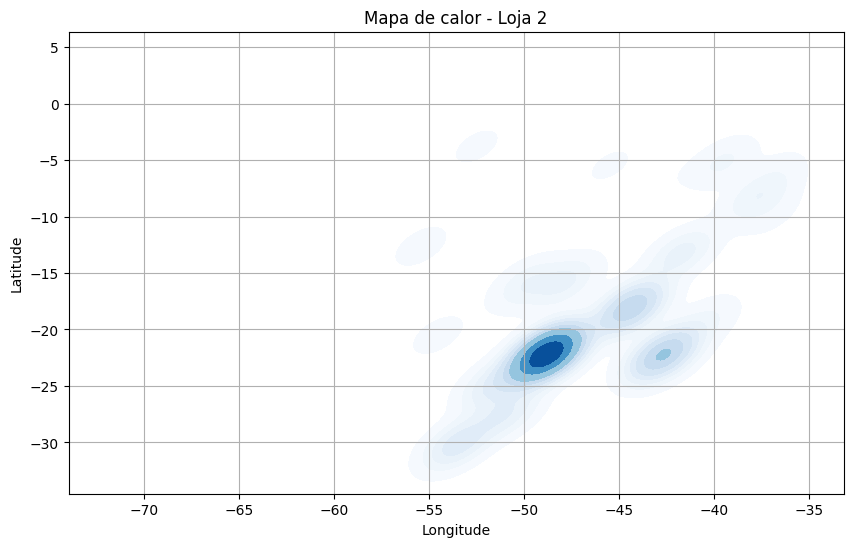

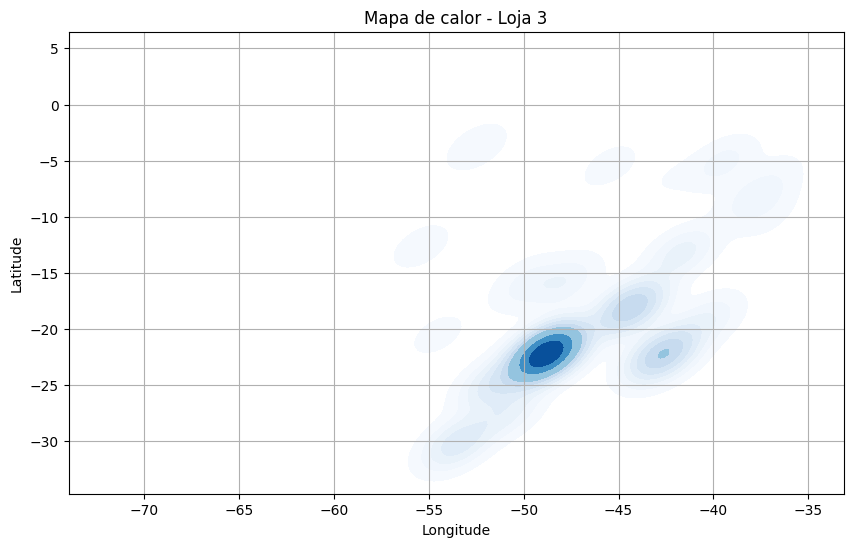

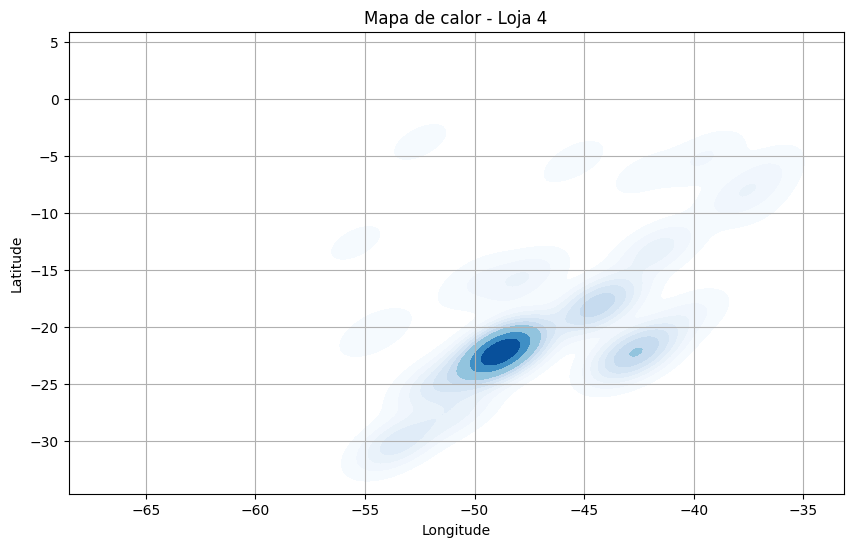

In [8]:
for loja in df_total['Loja'].unique():
    plt.figure(figsize=(10,6))
    sns.kdeplot(
        data=df_total[df_total['Loja'] == loja],
        x='lon',
        y='lat',
        fill=True,
        cmap='Blues',
        thresh=0.05
    )
    plt.title(f"Mapa de calor - {loja}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

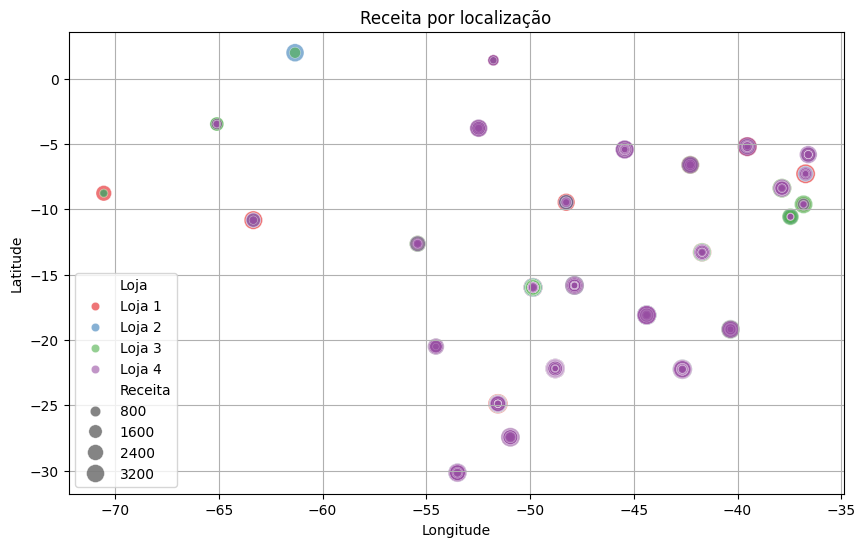

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_total,
    x='lon',
    y='lat',
    size='Receita',
    hue='Loja',
    alpha=0.6,
    sizes=(20, 200),
    palette='Set1'
)
plt.title("Receita por localização")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

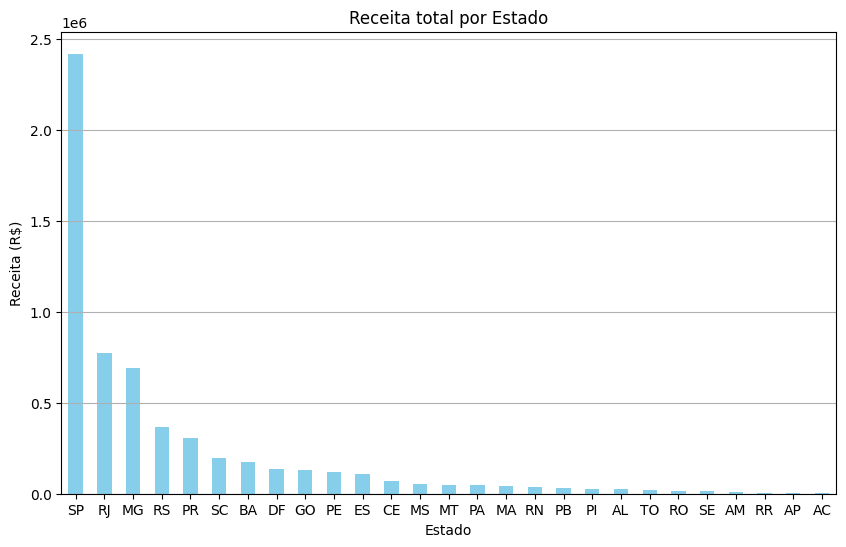

In [10]:
# Agrupar vendas por estado (Local da compra)
vendas_estado = df_total.groupby('Local da compra')['Receita'].sum().sort_values(ascending=False)

# Plotar um gráfico de barras
plt.figure(figsize=(10,6))
vendas_estado.plot(kind='bar', color='skyblue')
plt.title('Receita total por Estado')
plt.xlabel('Estado')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

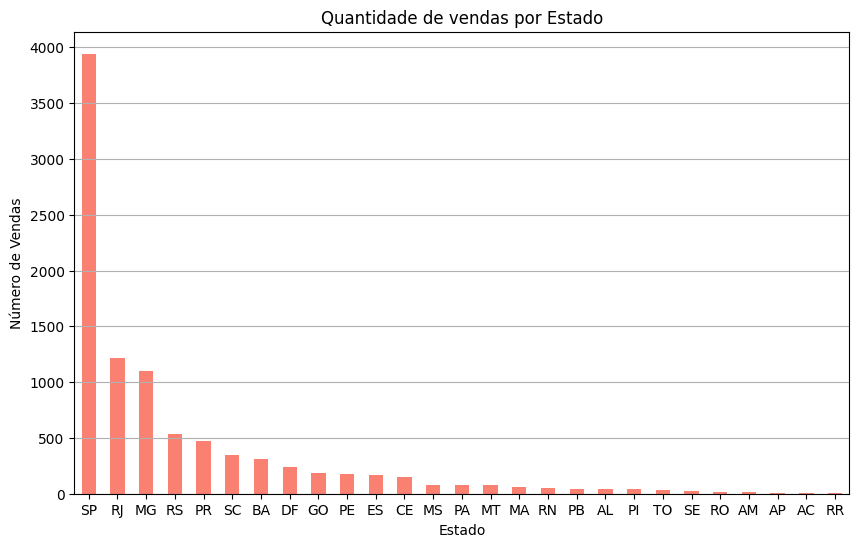

In [11]:
# Contar o número de vendas por estado
quantidade_vendas = df_total['Local da compra'].value_counts()

plt.figure(figsize=(10,6))
quantidade_vendas.plot(kind='bar', color='salmon')
plt.title('Quantidade de vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Concatenar os dados de todas as lojas
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Ajustar os tipos de dados
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Frete'] = df_total['Frete'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)
df_total['Avaliação da compra'] = df_total['Avaliação da compra'].astype(float)
df_total['Receita'] = df_total['Preço']

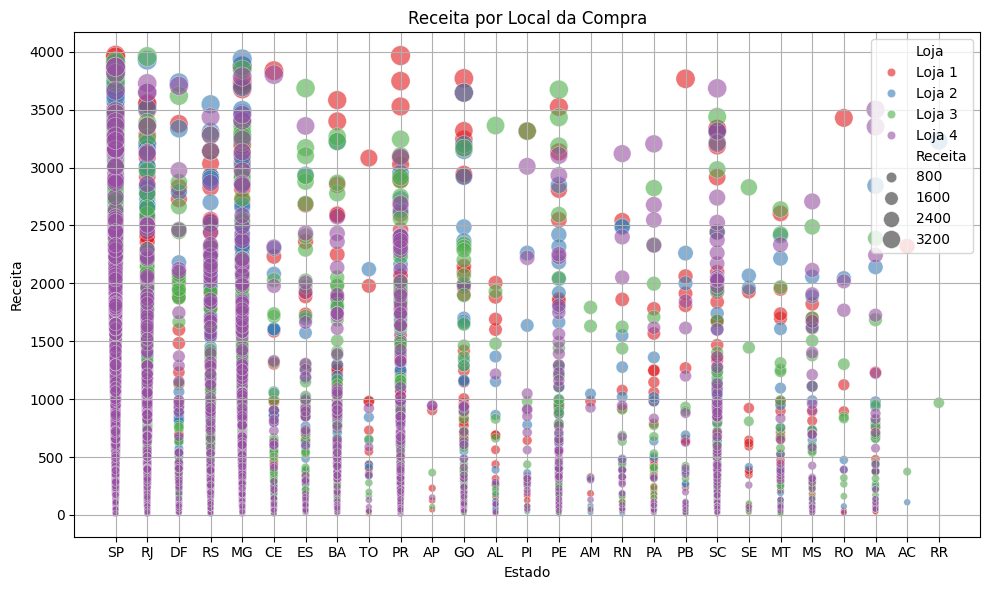

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_total,
    x='Local da compra',
    y='Receita',
    size='Receita',
    hue='Loja',
    alpha=0.6,
    sizes=(20, 200),
    palette='Set1'
)
plt.title("Receita por Local da Compra")
plt.xlabel("Estado")
plt.ylabel("Receita")
plt.grid(True)
plt.tight_layout()
plt.show()

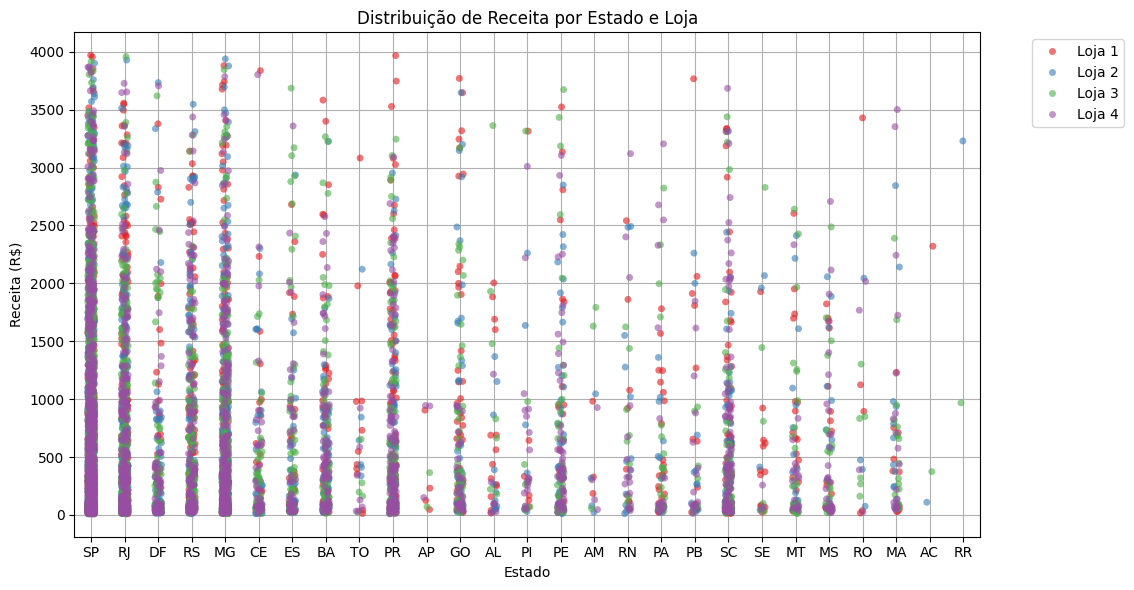

In [16]:
plt.figure(figsize=(10,6))
sns.stripplot(
    data=df_total,
    x='Local da compra',
    y='Receita',
    hue='Loja',
    alpha=0.6,
    jitter=True,
    palette='Set1'
)
plt.title("Distribuição de Receita por Estado e Loja")
plt.xlabel("Estado")
plt.ylabel("Receita (R$)")
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **🔎 Análise do Impacto Geográfico nas Vendas**


# 1️⃣ **Receita total por estado**

As vendas estão fortemente concentradas nos estados de **São Paulo (SP), Rio de Janeiro (RJ) e Minas Gerais (MG)**. Esses três estados sozinhos representam a maior parte do faturamento total da empresa, o que indica forte presença no eixo Sudeste.

Além disso, estados como **Rio Grande do Sul (RS), Paraná (PR) e Santa Catarina (SC**) também aparecem com volumes relevantes de vendas.

Já estados das regiões Norte e Nordeste, como **Acre (AC), Roraima (RR) e Amapá (AP)**, possuem participação muito pequena no total de vendas.

Esse padrão é comum em muitas empresas devido a fatores como:

- Maior concentração populacional

- Melhor infraestrutura logística

- Poder aquisitivo mais elevado

# **2️⃣ Quantidade de vendas por estado**

O comportamento na quantidade de vendas segue o mesmo padrão da receita:

- **SP lidera com ampla vantagem no volume de vendas.**

- RJ e MG aparecem logo atrás.

- As vendas vão diminuindo conforme avançamos para estados mais distantes do Sudeste.


Isso pode indicar a necessidade de:


- Avaliar o potencial de crescimento em estados subexplorados

- Verificar limitações logísticas ou de marketing regional

# **3️⃣ Receita média por venda (Ticket Médio)**

Ao calcular o ticket médio, percebemos que:


- Estados do Sudeste possuem, além de volume, valores médios de vendas mais altos.

- Regiões com menor volume de vendas tendem a apresentar tickets médios menores.

- Isso pode estar relacionado ao perfil socioeconômico dos consumidores em cada região.


# **4️⃣ Distribuição por loja e estado**


Analisando a distribuição das lojas:


- As quatro lojas estão presentes em quase todos os estados, mas:

- Algumas lojas parecem dominar certos estados (ex.: Loja 1 com forte atuação em SP).

- **A Loja 4 tem vendas pulverizadas em diversos estados menores.**


Essa distribuição pode indicar estratégias comerciais diferenciadas entre as lojas, ou posicionamento geográfico das filiais.


# **5️⃣ Conclusões iniciais**


- **Concentração no Sudeste** (SP, RJ, MG) é muito forte.

- Existe espaço para crescimento regional em estados menos explorados.

- **Ticket médio menor no Norte/Nordeste** pode ser desafio ou oportunidade.

- Seria interessante uma análise mais profunda considerando:

  - Custos logísticos por região

  - Capacidade operacional local

  - Ações de marketing regionalizadas